# Problem 2

<img src="2.jpg" width="80%" />

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

...

In [2]:
# ``a'' stands for ``attendance''
df = pd.DataFrame({
    'a': [4000, 4500, 5000, 5500, 6000],
    'p': [.1, .3, .3, .2, .1],
})
star = 1
df.a += star
df['sales'] = df.a * .40
df.transpose()

,0,1,2,3,4
a,4001.0,4501.0,5001.0,5501.0,6001.0
p,0.1,0.3,0.3,0.2,0.1
sales,1600.4,1800.4,2000.4,2200.4,2400.4


In [3]:
parms = pd.DataFrame(dict(
    base_cost = 200,
    unit_cost = 30,
    unit_income = 60,
    base_income = 300,
), index=[1])
parms

,base_cost,base_income,unit_cost,unit_income
1,200,300,30,60


In [4]:
def gen_profit(df, parms):
    def profit(q):
        sold = np.minimum(df.sales, q)
        profit = (
            sold*parms.unit_income
            - q*parms.unit_cost
            + parms.base_income
            - parms.base_cost 
        )
        return profit
    return profit
def gen_profit_moments(df, parms):
    profit = gen_profit(df, parms)
    def profit_moments(q):
        pro = profit(q)
        mu = (df.p * pro).sum()
        std = np.sqrt((df.p * (pro - mu)**2).sum())
        return mu, std
    return profit_moments

In [5]:
QQ = np.arange(df.sales.min(), df.sales.max() + 1, 1)
profit, moments = gen_profit(df, parms), gen_profit_moments(df, parms)

In [6]:
expvar = pd.DataFrame(index=QQ, data=list(map(moments, QQ)), columns=['E', 'sigma'])
low = df.assign(p=1).iloc[0, :]
low = list(map(lambda x: np.asscalar(x), map(gen_profit(low, parms), QQ)))
high = df.assign(p=1).iloc[4, :]
high = list(map(lambda x: np.asscalar(x), map(gen_profit(high, parms), QQ)))

In [7]:
df.assign(p=1).iloc[[0, 4], :]

,a,p,sales
0,4001,1,1600.4
4,6001,1,2400.4


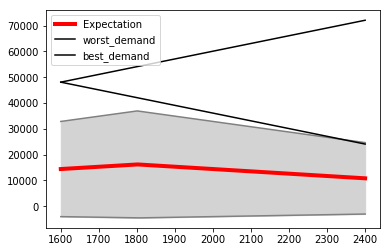

In [9]:
plt.plot(QQ, expvar.E, color='red', linewidth=4, label='Expectation')
explow, exphigh = expvar.E - expvar.sigma, expvar.E + expvar.sigma
plt.plot(QQ, explow, color='gray')
plt.plot(QQ, exphigh, color='gray')
plt.plot(QQ, low, color='black', label='worst_demand')
plt.plot(QQ, high, color='black', label='best_demand')
plt.fill_between(QQ, explow, exphigh, color='lightgray')
plt.legend()
plt.show()

In [10]:
expvar.E.argmax()

1800.4000000000001